<a href="https://colab.research.google.com/github/sidhu2690/CogniXis/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now, let's build a classification model using PyTorch.  
First, we will build a dataset using the `sklearn` library, and then we will use PyTorch to build and train the model.


In [ ]:
import sklearn
from sklearn.datasets import make_circles

In [ ]:
n_sample= 1000

In [ ]:
X, y= make_circles(n_sample, noise= 0.05, random_state= 42)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

Here, the input `X` has 2 features (i.e., it's a matrix with 1000 rows and 2 columns).  
We have to deal with this carefully.


In [ ]:
X1, X2= X[:, 0], X[:, 1]

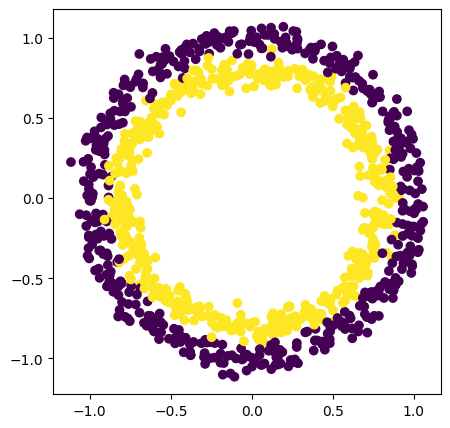

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.scatter(X1, X2, c=y)
plt.show()

Now let's build the model

In [ ]:
import torch
from torch import nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
X = torch.from_numpy(X).type(torch.float).to(device)
y = torch.from_numpy(y).type(torch.float).to(device)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
class Classification_model(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1= nn.Linear(in_features= 2, out_features= 5)
    self.layer_2= nn.Linear(in_features= 5, out_features=10)
    self.layer_3= nn.Linear(in_features=10, out_features=1 )

  def forward(self, x):
    z= self.layer_1(x)
    z= self.layer_2(z)
    z= self.layer_3(z)
    return z


In [ ]:
Model= Classification_model().to(device)

In [ ]:

Model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.6504, -0.3435],
                      [ 0.2626,  0.5711],
                      [-0.3016,  0.6044],
                      [ 0.6482, -0.1030],
                      [-0.4114,  0.5442]])),
             ('layer_1.bias',
              tensor([0.0835, 0.1912, 0.2004, 0.1130, 0.1559])),
             ('layer_2.weight',
              tensor([[-0.2812,  0.4102,  0.1295, -0.2478, -0.0659],
                      [ 0.2764,  0.4108, -0.4136,  0.3168, -0.3607],
                      [ 0.1153, -0.2427,  0.2336, -0.3655, -0.4177],
                      [ 0.2433, -0.0878,  0.1812,  0.3303,  0.4321],
                      [-0.1321,  0.0672, -0.1480,  0.2687, -0.3557],
                      [ 0.0132,  0.4403,  0.0432, -0.3693, -0.2168],
                      [-0.3207,  0.3083,  0.0474, -0.0120,  0.0359],
                      [ 0.1886,  0.1658,  0.0405, -0.3536, -0.1278],
                      [-0.0675,  0.0598,  0.1934, -0.4430, -0.3948],
       

In [ ]:
loss_fn= nn.BCEWithLogitsLoss()

In [ ]:
optimizer= torch.optim.SGD(params=Model.parameters(),
                           lr=0.001)

In [ ]:
def acc(y_pred, y_test):
  corr= torch.eq(y_pred.round(), y_test).sum().item()
  return corr / len(y_pred) * 100

Now train the model

In [ ]:
with torch.no_grad():
  logits = Model(X_test).to(device)
logits[:5]

tensor([[0.1173],
        [0.1397],
        [0.1627],
        [0.1037],
        [0.3116]])

In [ ]:
pred_prob=torch.sigmoid(logits).to(device)
pred_prob[:5]

tensor([[0.5293],
        [0.5349],
        [0.5406],
        [0.5259],
        [0.5773]])

In [ ]:
y_pred = torch.round(pred_prob)
y_pred[:5]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [ ]:

y_pred.shape

torch.Size([200, 1])

In [ ]:
torch.eq(y_pred.squeeze(), y_test).sum().item()

100

So, this many correct predictions were made by the model. However, it is just making random predictions.  
We need the model to perform better, so we have to train it.


In [ ]:
torch.manual_seed(42)

epochs= 100

for epoch in range(epochs):

  Model.train()

  y_logits = Model(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  accuracy= acc(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #testing mode

  Model.eval()

  with torch.inference_mode():
    test_logits=Model(X_test).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_accuracy= acc(test_pred, y_test)

    if epoch % 10 == 0:
      print(f"Loss: {loss} | accuracy: {accuracy} | test loss: {test_loss} | test_accuracy: {test_accuracy}")

Loss: 0.6997550129890442 | accuracy: 50.0 | test loss: 0.6984541416168213 | test_accuracy: 50.0
Loss: 0.6996895670890808 | accuracy: 50.0 | test loss: 0.6983911991119385 | test_accuracy: 50.0
Loss: 0.69962477684021 | accuracy: 50.0 | test loss: 0.6983291506767273 | test_accuracy: 50.0
Loss: 0.6995607018470764 | accuracy: 50.0 | test loss: 0.6982676982879639 | test_accuracy: 50.0
Loss: 0.699497401714325 | accuracy: 50.0 | test loss: 0.6982069611549377 | test_accuracy: 50.0
Loss: 0.6994346380233765 | accuracy: 50.0 | test loss: 0.6981468200683594 | test_accuracy: 50.0
Loss: 0.6993726491928101 | accuracy: 50.0 | test loss: 0.6980874538421631 | test_accuracy: 50.0
Loss: 0.6993111968040466 | accuracy: 50.0 | test loss: 0.6980288028717041 | test_accuracy: 50.0
Loss: 0.6992505788803101 | accuracy: 50.0 | test loss: 0.6979706287384033 | test_accuracy: 50.0
Loss: 0.6991904973983765 | accuracy: 50.0 | test loss: 0.6979132890701294 | test_accuracy: 50.0


Hmm, what do you notice about the performance of our model?

It looks like it went through the training and testing steps fine but the results don't seem to have moved too much.

The accuracy barely moves above 50% on each data split.

And because we're working with a balanced binary classification problem, it means our model is performing as good as random guessing (with 500 samples of class 0 and class 1 a model predicting class 1 every single time would achieve 50% accuracy).

The actual problem is that our model is still a linear model since it doesn't have any non-linearity.  
We need to introduce a non-linearity, and we will build a better model. Let's see how it will work.


In [ ]:
class Better_Model(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1= nn.Linear(in_features= 2, out_features= 10)
    self.layer_2= nn.Linear(10, 10)
    self.layer_3= nn.Linear(10, 1)
    self.relu= nn.ReLU()

  def forward(self, x):
    z= self.layer_1(x)
    Z= self.relu(z)
    z= self.layer_2(z)
    z= self.relu(z)
    z= self.layer_3(z)
    return z

In [ ]:
Model=Better_Model().to(device)

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

In [ ]:
optimizer= torch.optim.SGD(params=Model.parameters(),
                           lr=0.01)

In [ ]:
epochs=10000

for epoch in range(epochs):
  Model.train()
  logits=Model(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(logits))

  loss= loss_fn(logits, y_train)
  accuracy= acc(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #model evaluation

  Model.eval()
  with torch.inference_mode():
    test_logits= Model(X_test).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))

    test_loss= loss_fn(test_logits, y_test)
    test_accuracy= acc(test_pred, y_test)

    if epoch % 1000 == 0:
      print(f"loss: {loss} | accuracy: {accuracy} | test loss: {test_loss} | test accuracy: {test_accuracy}")

loss: 0.6983180046081543 | accuracy: 50.0 | test loss: 0.6985318660736084 | test accuracy: 50.0
loss: 0.6929115056991577 | accuracy: 50.875 | test loss: 0.6942239999771118 | test accuracy: 49.0
loss: 0.6901589035987854 | accuracy: 53.75 | test loss: 0.6916565895080566 | test accuracy: 50.0
loss: 0.6877014636993408 | accuracy: 57.25 | test loss: 0.6888427734375 | test accuracy: 54.50000000000001
loss: 0.6846757531166077 | accuracy: 59.5 | test loss: 0.6853682994842529 | test accuracy: 61.0
loss: 0.6792426109313965 | accuracy: 56.375 | test loss: 0.6793229579925537 | test accuracy: 59.5
loss: 0.6723932027816772 | accuracy: 56.875 | test loss: 0.6732378602027893 | test accuracy: 60.5
loss: 0.662415087223053 | accuracy: 66.125 | test loss: 0.6663308143615723 | test accuracy: 64.0
loss: 0.6459571719169617 | accuracy: 76.625 | test loss: 0.6553717255592346 | test accuracy: 70.0
loss: 0.6203201413154602 | accuracy: 83.5 | test loss: 0.6359198093414307 | test accuracy: 77.0


# Kavithapole!

So let's try with sequential api

In [ ]:
class Sequential_model(nn.Module):
  def __init__(self):
    super().__init__()

    self.model= nn.Sequential(
        nn.Linear(2,10),
        nn.ReLU(),
        nn.Linear(10,10),
        nn.ReLU(),
        nn.Linear(10,1)
    )

  def forward(self, x):
    return self.model(x)

In [ ]:
Model= Sequential_model().to(device)

In [ ]:
loss_fn= nn.BCEWithLogitsLoss()
optimizer= torch.optim.Adam(params=Model.parameters(),
                            lr=0.001)

In [ ]:
epochs=1000

for epoch in range(epochs):
  Model.train()
  logits= Model(X_train).squeeze()
  y_pred= torch.round(torch.sigmoid(logits))

  loss= loss_fn(logits, y_train)
  accuracy= acc(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  Model.eval()
  with torch.inference_mode():
    test_logits= Model(X_test).squeeze()
    test_pred= torch.round(torch.sigmoid(test_logits))

    test_loss= loss_fn(test_logits, y_test)
    test_accuracy= acc(test_pred, y_test)

    if epoch % 100 == 0:
      print(f"training loss: {loss} | training accuracy {accuracy} | test loss {test_loss} | test_accuracy {test_accuracy}")

training loss: 0.6943962574005127 | training accuracy 50.0 | test loss 0.6936678290367126 | test_accuracy 50.0
training loss: 0.6868781447410583 | training accuracy 59.0 | test loss 0.6841414570808411 | test_accuracy 58.5
training loss: 0.6588518619537354 | training accuracy 73.625 | test loss 0.6620534658432007 | test_accuracy 72.5
training loss: 0.5931111574172974 | training accuracy 83.75 | test loss 0.6109346151351929 | test_accuracy 78.0
training loss: 0.4750717580318451 | training accuracy 92.125 | test loss 0.5117307901382446 | test_accuracy 87.0
training loss: 0.3532789647579193 | training accuracy 95.625 | test loss 0.41182273626327515 | test_accuracy 92.0
training loss: 0.24920329451560974 | training accuracy 97.875 | test loss 0.32048922777175903 | test_accuracy 92.5
training loss: 0.1845594346523285 | training accuracy 97.875 | test loss 0.26167210936546326 | test_accuracy 93.5
training loss: 0.14348047971725464 | training accuracy 98.0 | test loss 0.2234424650669098 | test